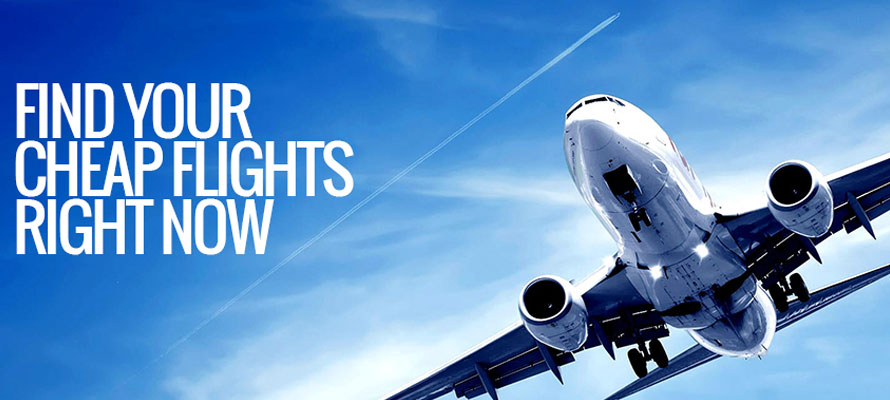

# Problem Statament

Flight ticket prices can be something hard to guess,
today we might see a price, check out the price of the same flight tomorrow,
and it will be a different story.

To solve this problem, we have been provided with prices of flight tickets for various airlines <span style="color:red">
between the months of March and June of 2019 and between various cities </span>, 
using which <span style="color:red">we aim to build a model which predicts the fare of the flights using various input features</span>.

# The Dataset

Link for the dataset — https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects
We have 2 datasets here — training set and test set.
The training set contains the features, along with the prices of the flights. It contains <span style="color:red"> 10683 records, 10 input features and 1 output column — ‘Price’</span>.
The test set contains <span style="color:red">2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set</span>. We will use Regression techniques here, since the predicted output will be a continuous value.
Following is the description of features available in the dataset –
1. Airline: The name of the airline.
2. Date_of_Journey: The date of the journey
3. Source: The source from which the service begins.
4. Destination: The destination where the service ends.
5. Route: The route taken by the flight to reach the destination.
6. Dep_Time: The time when the journey starts from the source.
7. Arrival_Time: Time of arrival at the destination.
8. Duration: Total duration of the flight.
9. Total_Stops: Total stops between the source and destination.
10. Additional_Info: Additional information about the flight
11. Price: The price of the ticket

# Import libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Data_Train.xlsx', sheet_name='Sheet1')

In [3]:
data.shape

(10683, 11)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We identify the below mentioned points from above two cells –
1. The Route column contains a list of cities which we will need to separate, since we would have multiple combinations in our dataset.
2. The Arrival time column has dates attached along with, which we will need to separate. These are the cases when the flight takes off from the source on a date and reaches its destination on the next day.
3. The Duration is in a string format, which we will need to convert to integer type.
4. The total stops also has text ‘stops’ added along with the number of stops, and certain columns as ‘non-stop’, which we will need to convert to integer types.


# Missing values

In [6]:
features_with_MV = data.isnull().sum() > 0
data.isnull().sum()[features_with_MV]

Route          1
Total_Stops    1
dtype: int64

We have 1 missing value in Route column, and 1 missing value in Total stops column. We will meaningfully replace the missing values going further.

We now start exploring the columns available in our dataset. The first thing we do is to create a list of categorical columns, and check the unique values present in these columns –

In [7]:
# ceating list of category columns

category = ['Airline', 'Source', 'Destination', 'Additional_Info']

In [8]:
# checking unique values in each column

for feature in category:
    print(data[feature].unique())
    print('---------------------------------------------------------------')

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
---------------------------------------------------------------
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
---------------------------------------------------------------
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
---------------------------------------------------------------
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
---------------------------------------------------------------


Airline column has 12 unique values - 'IndiGo' , 'Air India', 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy' , 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'.

Source column has 5 unique values – ‘Bangalore’, ‘Kolkata’, ‘Chennai’, ‘Delhi’ and ‘Mumbai’.

Destination column has 6 unique values - 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi' , 'Hyderabad'.

Additional info column has 10 unique values - 'No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover' , 'No Info', '1 Long layover', 'Change airports' , 'Business class', 'Red-eye flight' , '2 Long layover'

We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

# Treating the columns

In [9]:
# treating the date_of_journey column

data['Date_of_Journey'] = data['Date_of_Journey'].str.split('/')
data['Date_of_Journey']

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [10]:
data['Date'] = data['Date_of_Journey'].str[0]
data['Month'] = data['Date_of_Journey'].str[1]
data['Year'] = data['Date_of_Journey'].str[2]

Further, we split the Route column to create multiple columns with cities that the flight travels through. We check the maximum number of stops that a flight has, to confirm what should be the maximum number of cities in the longest route –

In [11]:
# treating the route columns

data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns –

In [12]:
data.Route = data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [13]:
data['City1'] = data.Route.str[0]
data['City2'] = data.Route.str[1]
data['City3'] = data.Route.str[2]
data['City4'] = data.Route.str[3]
data['City5'] = data.Route.str[4]
data['City6'] = data.Route.str[5]

In the similar manner, we split the Dep_time column, and create separate columns for
departure hours and minutes –

In [14]:
# treating dep_time col

data['Dep_Time'] = data['Dep_Time'].str.split(':')

In [15]:
data['Dep_Time_hr'] = data['Dep_Time'].str[0]
data['Dep_Time_min'] = data['Dep_Time'].str[1]

Further, for the arrival date and arrival time separation, we split the ‘Arrival_Time’ column,
and create ‘Arrival_date’ column. We also split the time and divide it into
‘Arrival_time_hours’ and ‘Arrival_time_minutes’, similar to what we did with the ‘Dep_time’
column –

In [16]:
# treating the Arrival_Time column
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ')

In [17]:
data['Arrival_date'] = data['Arrival_Time'].str[1]

In [18]:
data['Arrival_time_only'] = data['Arrival_Time'].str[0]
data['Arrival_time_only'] = data['Arrival_time_only'].str.split(':')
data['Arrival_time_hr'] = data['Arrival_time_only'].str[0]
data['Arrival_time_min'] = data['Arrival_time_only'].str[1]

In [19]:
# treating the duration column
data['Duration'] = data['Duration'].str.split(' ')

In [20]:
data['Duration_hr'] = data['Duration'].str[0]
data['Duration_hr'] = data['Duration_hr'].str.split('h')
data['Duration_hr'] = data['Duration_hr'].str[0]

data['Duration_min'] = data['Duration'].str[1]
data['Duration_min'] = data['Duration_min'].str.split('m')
data['Duration_min'] = data['Duration_min'].str[0]

We also treat the ‘Total_stops’ column, and replace non-stop flights with 0 value and
extract the integer part of the ‘Total_Stops’ column –

In [21]:
data['Total_Stops'].replace('non-stop', '0', inplace = True)
data['Total_Stops'] = data['Total_Stops'].str.split(' ')
data['Total_Stops'] = data['Total_Stops'].str[0]                         

We proceed further to the ‘Additional_info’ column, where we observe that there are 2
categories signifying ‘No info’, which are divided into 2 categories since ‘I’ in ‘No Info’ is
capital. We replace ‘No Info’ by ‘No info’ to merge it into a single category –

In [22]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [23]:
data['Additional_Info'].replace('No Info', 'No info', inplace = True)

In [24]:
data.drop(['Date_of_Journey','Route', 'Dep_Time', 'Arrival_Time', 'Arrival_time_only', 'Duration'], axis =1, inplace = True)

We now drop all the columns from which we have extracted the useful information
(original columns). We also drop some columns like ‘city6’ and ‘city5’, since majority of
the data in these columns was NaN(null). As a result, we now obtain 20 different columns,
which we will be feeding to our ML model. But first, we treat the missing values and
explore the contents in the columns and its impact on the flight price, to separate a list of
final set of columns.

# Imputing missing values

In [25]:
features_with_MV = data.isnull().sum() > 0
data.isnull().sum()[features_with_MV]

Total_Stops         1
City1               1
City2               1
City3            3492
City4            9117
City5           10637
City6           10682
Arrival_date     6348
Duration_min     1032
dtype: int64

In [26]:
# dropping 'City4','City5','City6' as these columns contain huge no of missing values 
data.drop(['City4','City5','City6'], axis = 1, inplace = True)

In [27]:
# city1 has empty coumn, we will check the data and replace it as its route is not available
data[data['City1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_hr,Dep_Time_min,Arrival_date,Arrival_time_hr,Arrival_time_min,Duration_hr,Duration_min
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


We find out that this is the same row in which ‘Route’ was missing. This row also has
‘Total_stops’ as NaN. We replace City 1 in this row as ‘DEL’ and ‘City2’ as COK. We
replace ‘Total_stops’ as 0 here.

We further replace ‘NaN’ values in ‘City3’ with ‘None’, since rows where ‘City3’ is missing
did not have any stop, just the source and the destination.

We also replace missing values in ‘Arrival_date’ column with values in ‘Date’ column,
since the missing values are those values where the flight took off and landed on the
same date.

We also replace missing values in ‘Travel_mins’ as 0, since the missing values represent
that the travel time was in terms on hours only, and no additional minutes.

In [28]:
data['City1'].fillna('DEL', inplace = True)
data['City2'].fillna('COK', inplace = True)
data['Total_Stops'].fillna('0', inplace = True)

In [29]:
data['City3'].fillna('None', inplace = True)

In [30]:
data['Arrival_date'].fillna(data['Date'], inplace = True)

In [31]:
data['Duration_min'].fillna('0', inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10683 non-null  object
 4   Additional_Info   10683 non-null  object
 5   Price             10683 non-null  int64 
 6   Date              10683 non-null  object
 7   Month             10683 non-null  object
 8   Year              10683 non-null  object
 9   City1             10683 non-null  object
 10  City2             10683 non-null  object
 11  City3             10683 non-null  object
 12  Dep_Time_hr       10683 non-null  object
 13  Dep_Time_min      10683 non-null  object
 14  Arrival_date      10683 non-null  object
 15  Arrival_time_hr   10683 non-null  object
 16  Arrival_time_min  10683 non-null  object
 17  Duration_hr 

In [33]:
data.isnull().sum().sum()

0

Using the above steps, we were successfully able to treat all the missing values from our
data. We again check the info in our data and find out that the dataset still has data types
for multiple columns as ‘object’, where it should be ‘int’ –

Now, we try to change the datatype of the required columns –

In [34]:
# data[['Total_Stops','Date', 'Month', 'Year','Dep_Time_hr', 'Dep_Time_min', 'Arrival_date',
#        'Arrival_time_hr', 'Arrival_time_min', 'Duration_hr', 'Duration_min']].astype('int64')

During this step, we face issue converting the ‘Travel_hours’ column, saying that the
column has data as ‘5m’, which is not allowing its conversion to ‘int’.
We print this row to check the data once –

In [35]:
data[data['Duration_hr'] == '5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_hr,Dep_Time_min,Arrival_date,Arrival_time_hr,Arrival_time_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,03,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot
fly from BOMBAY->GOA->PUNE->HYDERABAD in 5 mins! (The flight has ‘Total_stops’
as 2)
We choose to drop this row due to incorrect data present in the row.

In [36]:
data.drop(index = 6474, axis = 0, inplace = True)

In [37]:
list = ['Total_Stops','Date', 'Month', 'Year','Dep_Time_hr', 'Dep_Time_min','Arrival_date',
       'Arrival_time_hr', 'Arrival_time_min', 'Duration_hr', 'Duration_min']
for feature in list:
    data[feature] = data[feature].astype('int64')

In [38]:
data.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Additional_Info     object
Price                int64
Date                 int64
Month                int64
Year                 int64
City1               object
City2               object
City3               object
Dep_Time_hr          int64
Dep_Time_min         int64
Arrival_date         int64
Arrival_time_hr      int64
Arrival_time_min     int64
Duration_hr          int64
Duration_min         int64
dtype: object

# Data visualisation

In [39]:
# data.columns[data.dtypes == 'object']
# data.columns[data.dtypes != 'object']

# Univariate analysis

In [40]:
# categorical feature
categorical = ['Airline', 'Source', 'Destination', 'Additional_Info',
       'City1', 'City2', 'City3']

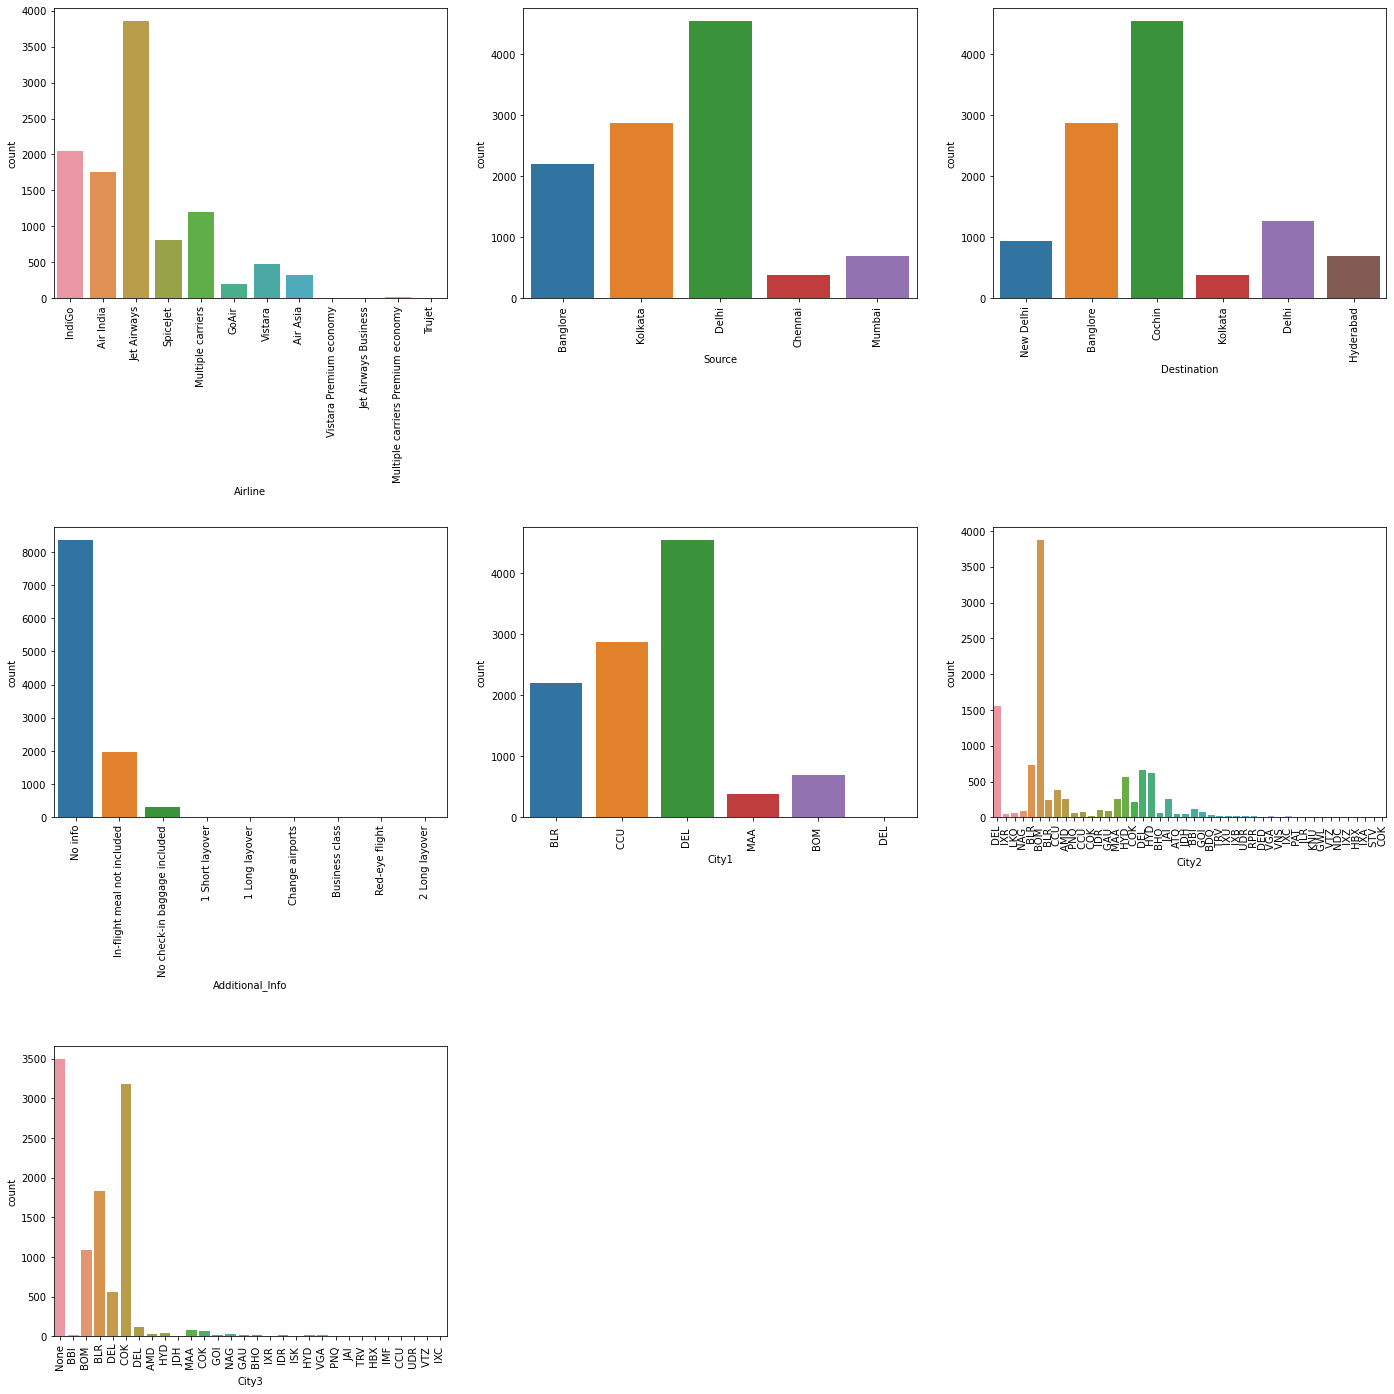

In [41]:
plt.rcParams['figure.figsize'] = (20,20)
for feature in categorical:
    plt.subplot(3, 3, categorical.index(feature)+1)
    sns.countplot(data = data, x = feature)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
plt.show()

We make the below mentioned observations using the plots above –

Airlines

Jet Airways is the most preferred airline with the highest row count, followed by
Indigo and AirIndia.
Count for Vistara Premium economy, Trujet, Multiple carries premium economy and
Jet airways business is quite low.

Source

Majority of the flights take off from Delhi
Chennai has the minimum count of flight take-offs

Destination

Maximum flights land in Cochin
Kolkata has the lowest count of receiving the flights

Additional Info

Maximum rows have No info as the value.
We need to check how this column impacts the prices

City1

City1 has same data as source column
An additional value has been observed for ‘ DEL’, there is an extra Space in the
name, count for this is very low. We will merge this with ‘DEL’.

City2

Majority of the flights take a stop in Bombay.
There are many cities with a very low count for stops. We will check how flights with
1stop impact prices of flights, and if any relation is there with stop place.

City3

Majority of the flights have no 2nd stop
If there is a second stop, chances are high of the place being Cochin.

We now plot distribution plots to check the distribution in numerical data –

In [42]:
data['City1'].replace('DEl', 'DEL', inplace=True)

In [43]:
# numerical feature
numerical = ['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_hr',
       'Dep_Time_min', 'Arrival_date', 'Arrival_time_hr', 'Arrival_time_min',
       'Duration_hr', 'Duration_min']

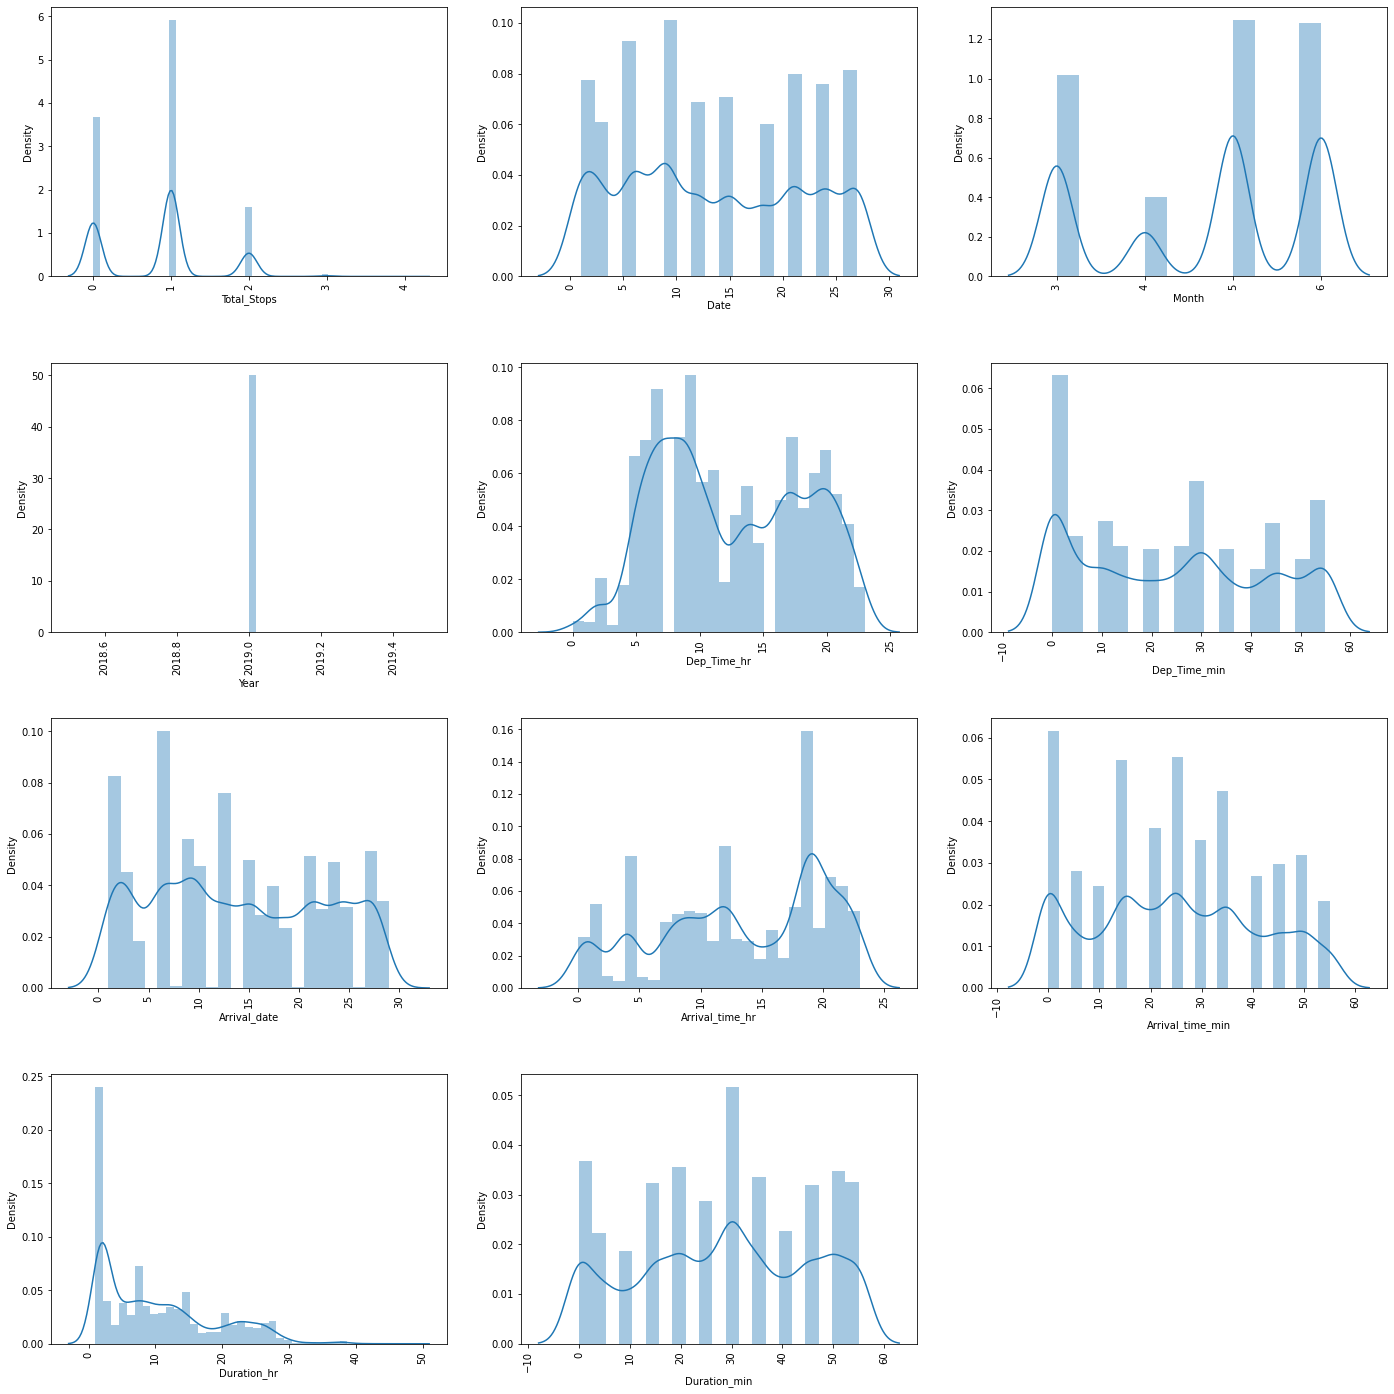

In [44]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (20,20)
for feature in numerical:
    plt.subplot(4, 3, numerical.index(feature)+1)
    sns.distplot(data[feature])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
plt.show()

We make the below observations from the numerical data –

Total stops

Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

Date

There are no specific dates when the flights travel; the distribution is almost similar
for all dates

Month

People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during
holiday months

Year

This column has only 2019 as a value and can be dropped

Dep_Time_Hour

Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less
in number.

Dep_Time_Min

Most flights take off at whole hours (Mins as 00)

Arrival date

In majority of the cases, flights take off and land on the same day

Arrival time hour

Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning
and hence land after in the evening

Arrival time min

This distribution is similar and does not give out any dedicated information

Duration hours

Majority of the flights have travel time for around 2-3 hours, which seems ok since
these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of
stops in between

Duration mins

The data is divided and is not pointing towards any specific points

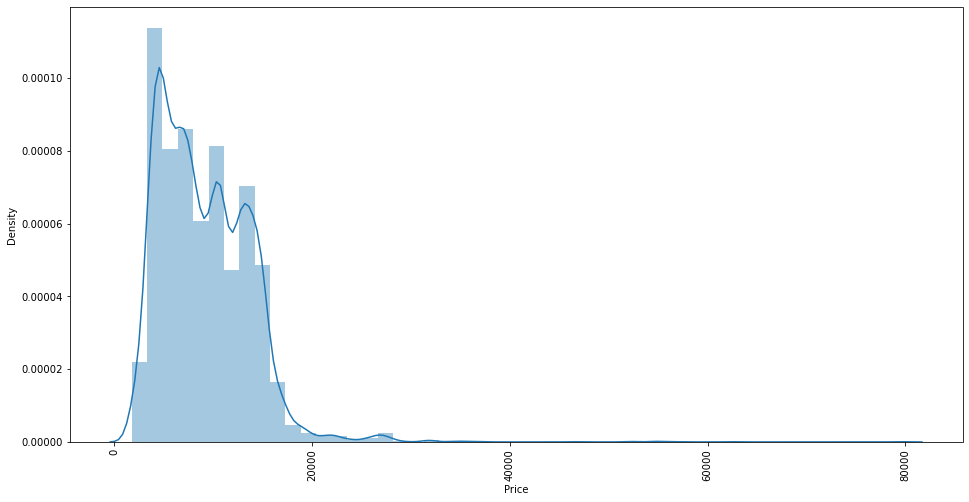

In [45]:
# dependent variable-Price

plt.rcParams['figure.figsize'] = (16,8)
sns.distplot(data['Price'])
plt.xticks(rotation = 90)
plt.show()

The price column contains the minimum value as 1759 and maximum value as 79512.
Majority of the flights have price range between 1759–20k, and number of flights having
prices greater than 20k are quite less. Price range is skewed towards right.

We will now compare the independent features with ‘Price’ column, to check the impact
on ‘Price’.

# Bivariate analysis

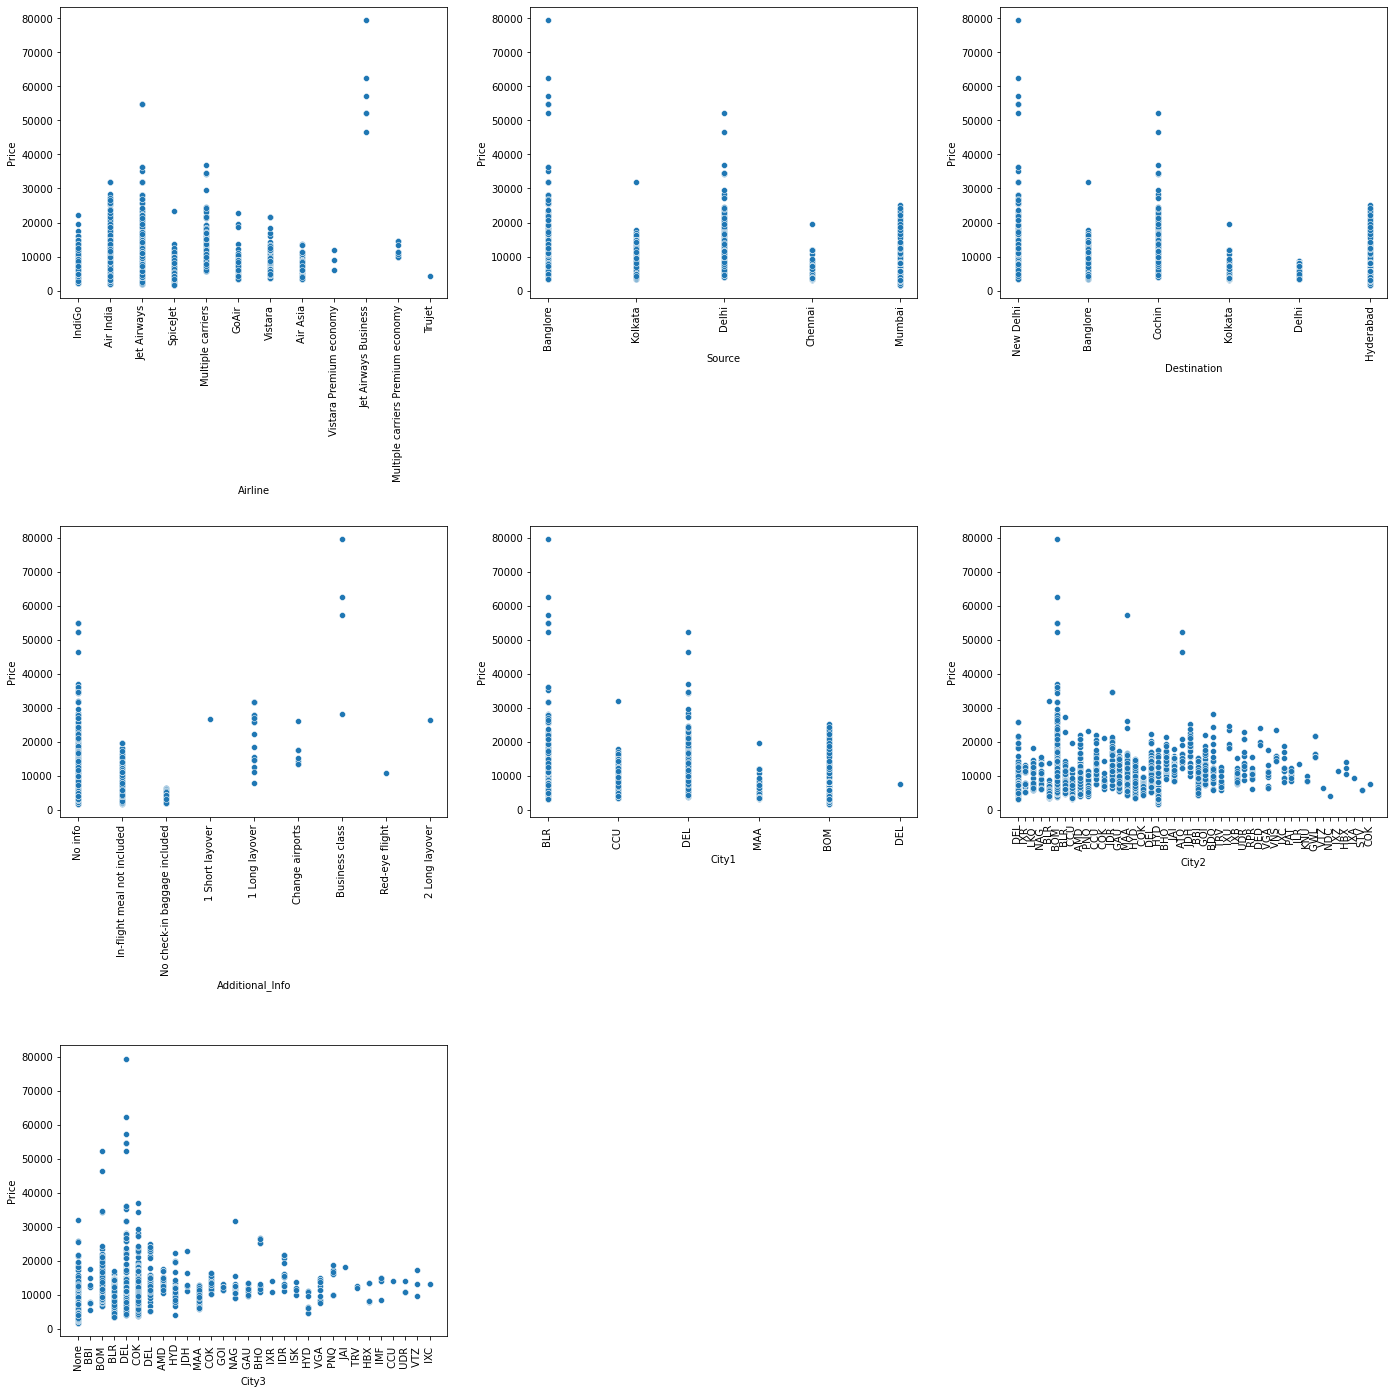

In [46]:
# categorical i.v. vs numerical d.v.

plt.rcParams['figure.figsize'] = (20,20)
for feature in categorical:
    plt.subplot(3, 3, categorical.index(feature)+1)
    sns.scatterplot(data = data, x = feature, y = 'Price')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
plt.show()

We make the following observations –
- Jet airways business class has the highest prices between 50k — 80k
- All the high cost flights depart from bangalore, rest of the flights have prices between 3k
— 50k
- All high cost flights have destination as Delhi, rest of the flights have prices between 3k
— 50k
- If a flight is of business class, its price would be high
- The flights with high prices having 1 stop, have stop in Bombay
- Flights with 2 stops, having higher prices, have stop in Delhi.

We have quite less data where prices are higher than 50k. We check these rows once –

In [47]:
data[data['Price'] >= 50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_hr,Dep_Time_min,Arrival_date,Arrival_time_hr,Arrival_time_min,Duration_hr,Duration_min
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,14,25,4,40


We make the below observations –
- We observe that the flights with high prices are 8 in number.
- Majority of these flights fly from the same route — BLR->BOM->DEL
- Majority of the flights belong to Business class
- All the flights have Airlines as Jet airways.
- All of these flights took flight in March

We now proceed with checking the relation of ‘Price’ column with numerical data –

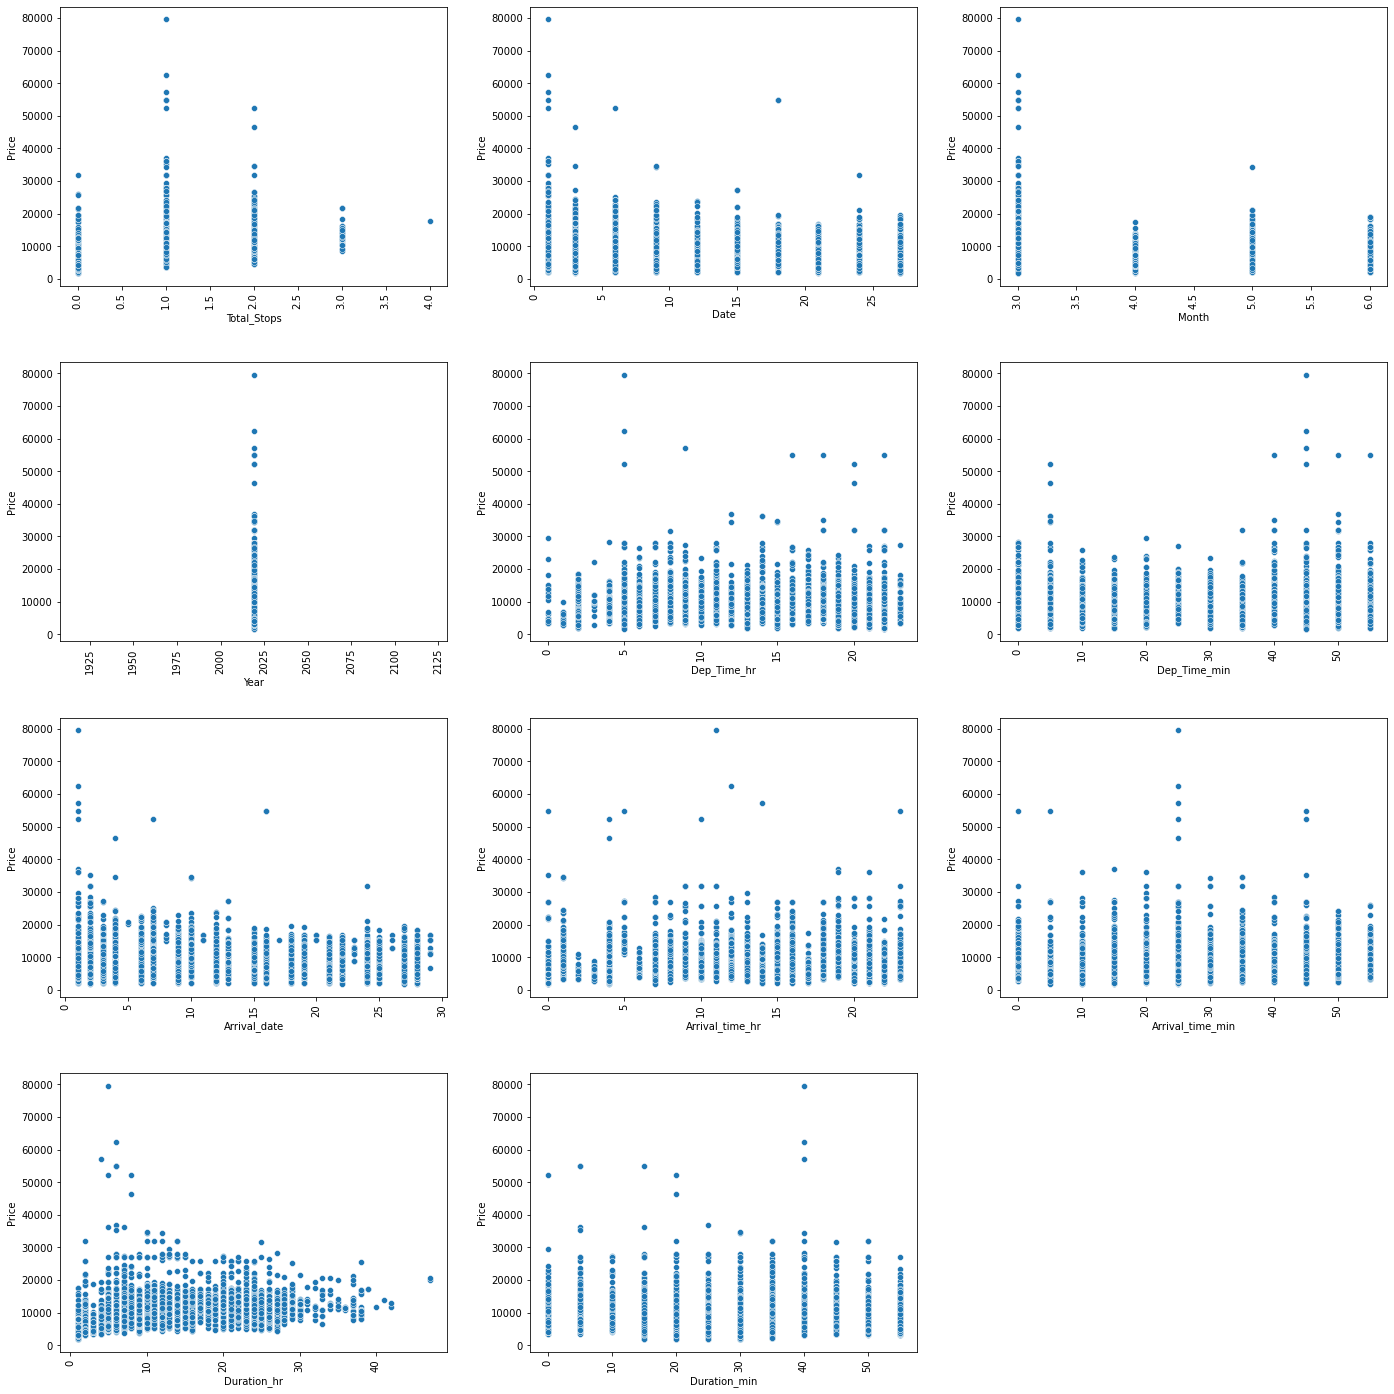

In [48]:
# numerical i.v. vs numerical d.v.

plt.rcParams['figure.figsize'] = (20,20)
for feature in numerical:
    plt.subplot(4, 3, numerical.index(feature)+1)
    sns.scatterplot(data= data, x = feature, y = 'Price')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
plt.show()

We observe that –
- As number of stops increase, the price range gets decreasing into a smaller price
window (10k — 22k)
- High price flights are lesser during end of month
- Prices are higher in the month of March
- With increase in duration hours, price increases, but the number of flights decrease.

After the above analysis, we drop the non-required columns, which we feel have no
impact on prices of flights. These columns include
'Dep_Time_min','Arrival_time_min','Duration_min','Year', 'City1'.



In [49]:
data.drop(['Dep_Time_min','Arrival_time_min','Duration_min','Year', 'City1'], axis = 1, inplace = True)

In [50]:
data.shape

(10682, 14)

We now have our final dataset with 10682 rows and 14 columns (including ‘Price’
column).

In [51]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'City2', 'City3', 'Dep_Time_hr',
       'Arrival_date', 'Arrival_time_hr', 'Duration_hr'],
      dtype='object')

# outliers detection

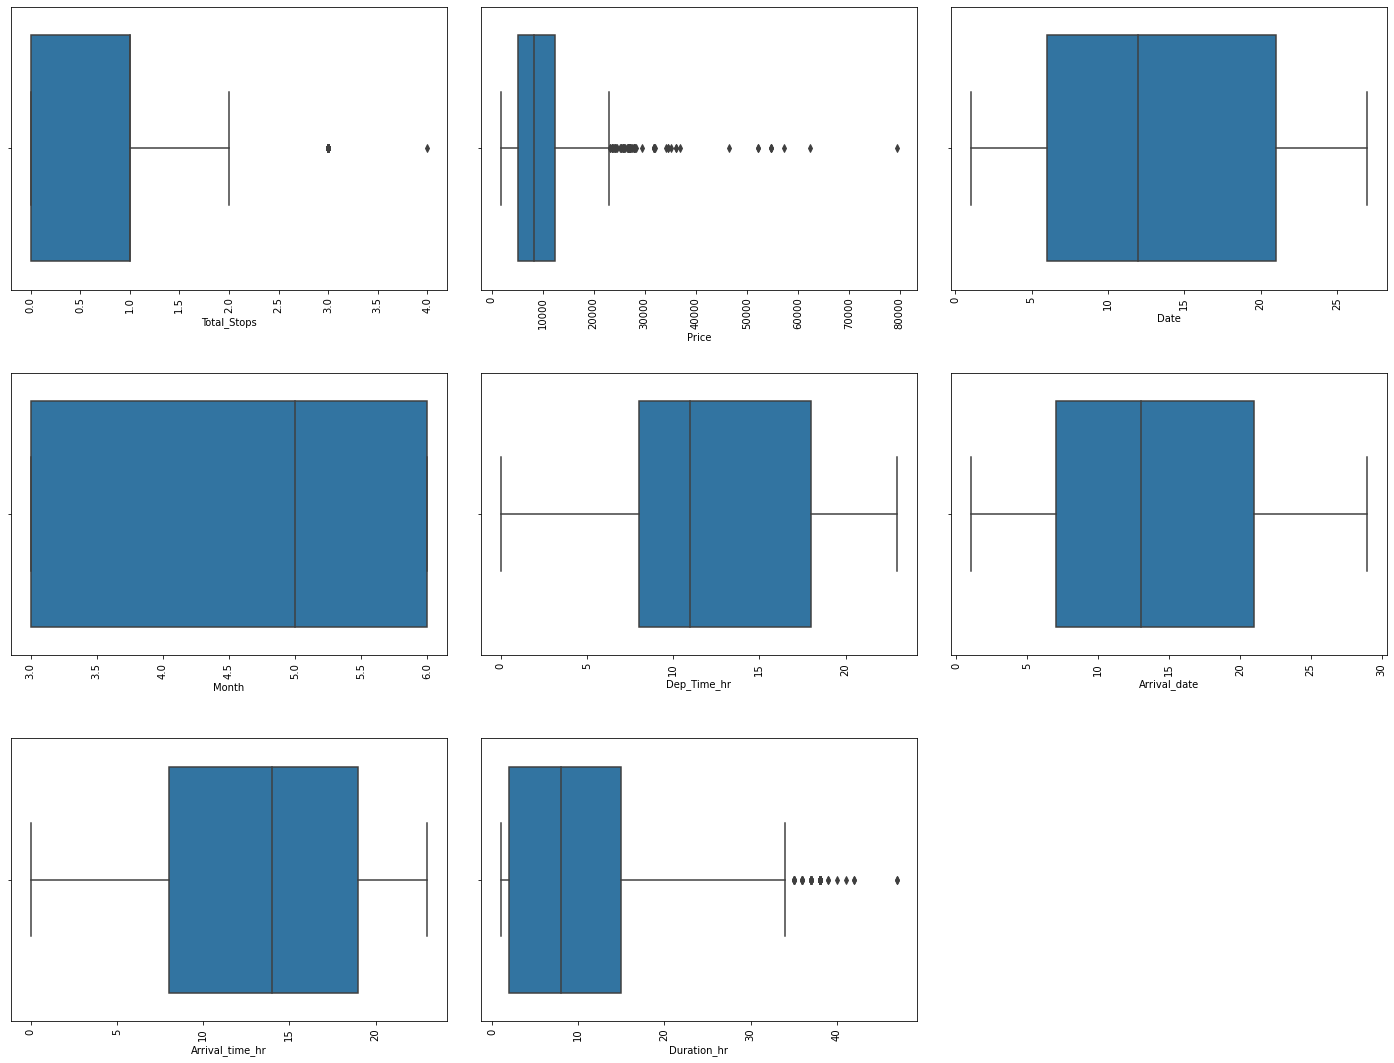

In [52]:
numerical = ['Total_Stops', 'Price', 'Date', 'Month', 'Dep_Time_hr', 'Arrival_date',
       'Arrival_time_hr', 'Duration_hr']

plt.rcParams['figure.figsize'] = (20,20)
for feature in numerical:
    plt.subplot(4, 3, numerical.index(feature)+1)
    sns.boxplot(data= data, x = feature)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
plt.show()

We make the below conclusions –
- Outliers are present in Duration hours, Total stops and price
- We will not remove outliers from total stops since price is impacted by number of stops
- We will not remove the data with high number of hours, increase in number of hours
shows a price pattern in the above graphs plotted for EDA.

# Skewness treatment

We now proceed with treating skewness in our data, which allows us to fit our data in a
symmetric distribution, which further allows our model to learn better.

In [53]:
data.skew()

Total_Stops        0.317345
Price              1.813248
Date               0.118174
Month             -0.387708
Dep_Time_hr        0.113224
Arrival_date       0.119667
Arrival_time_hr   -0.369876
Duration_hr        0.850822
dtype: float64

We need to treat skewness for ‘Travel_hours’ column, considering a threshold value for
skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

We use log transform method to remove skewness –

In [54]:
data['Duration_hr'] = np.log(data['Duration_hr'])

In [55]:
data['Duration_hr'].skew()

-0.26612233332369917

We have successfully treated skewness from our data. We will now proceed to ‘Encoding’
step.

# Encoding categorical data

We encode the categorical data in this step, to convert it to integer type, since the model
does not work on ‘string’ data. We use ‘Label Encoder’ to achieve the desired results –

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in data.columns[data.dtypes=='object']:
    data[feature] = le.fit_transform(data[feature])

In [57]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_hr,Arrival_date,Arrival_time_hr,Duration_hr
0,3,0,5,0,7,3897,24,3,13,29,22,22,1,0.693147
1,1,3,0,2,7,7662,1,5,25,1,5,1,13,1.945910
2,4,2,1,2,7,13882,9,6,32,4,9,10,4,2.944439
3,3,3,0,1,7,6218,12,5,34,3,18,12,23,1.609438
4,3,0,5,1,7,13302,1,3,34,8,16,1,21,1.386294


# Splitting d.v and i.v

In [58]:
y = data['Price']
x = data.drop('Price', axis = 1)

# Splitting train set and test set

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Feature scaling

The next step is to bring the data to a common scale, since there are certain columns
with very small values and some columns with high values. This process is important as
values on a similar scale allow the model to learn better.

We use standard scaler for this process –
StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean =
0 and scales the data to unit variance’

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting the regression model

We now proceed to the main step of our machine learning, fitting the model and
predicting the outputs. We fit the data into multiple regression models to compare the
performance of all models and select the best model –

In [61]:
# importing ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
# creating object for ML models
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()

In [63]:
for regressor in [lr, dt, knn, svr]:
    regressor.fit(x_train, y_train)
    pred = regressor.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, regressor.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(regressor)
        print('R2 score is', test_score)
        print('R2 for train data', train_score)
        print('Mean Absolute Error', mean_absolute_error(y_test, pred))
        print('Mean squared Error', mean_squared_error(y_test, pred))
        print('Root Mean squared Error', mean_squared_error(y_test, pred, squared=False))
        print('---------------------------------------------------')
        

LinearRegression()
R2 score is 0.5143383642868746
R2 for train data 0.4883941656291312
Mean Absolute Error 2266.007360144761
Mean squared Error 9831233.985202331
Root Mean squared Error 3135.479865220367
---------------------------------------------------
KNeighborsRegressor()
R2 score is 0.8169987949381079
R2 for train data 0.8443228059327974
Mean Absolute Error 1132.7991263650545
Mean squared Error 3704487.927887676
Root Mean squared Error 1924.7046339341723
---------------------------------------------------
SVR()
R2 score is 0.06037958893589945
R2 for train data 0.05376739833088795
Mean Absolute Error 3361.330067591282
Mean squared Error 19020707.9150467
Root Mean squared Error 4361.273657436173
---------------------------------------------------


We achieve the best score using K-Neighbors regressor, with an r2_score of 81%. We
also obtain the minimum values for mean_absolute_error, mean_squared_error and
root_mean_squared_error (regression metrics) with this model.

We try to use ensemble models to check if our performance improves using ensemble
models -

In [64]:
# import ensemble models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()

In [65]:
for regressor in [rf, ab, gb]:
    regressor.fit(x_train, y_train)
    pred = regressor.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, regressor.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(regressor)
        print('R2 score is', test_score)
        print('R2 for train data', train_score)
        print('Mean Absolute Error', mean_absolute_error(y_test, pred))
        print('Mean squared Error', mean_squared_error(y_test, pred))
        print('Root Mean squared Error', mean_squared_error(y_test, pred, squared=False))
        print('---------------------------------------------------')
        

RandomForestRegressor()
R2 score is 0.8601609441153404
R2 for train data 0.9749221923653913
Mean Absolute Error 727.6692194631855
Mean squared Error 2830757.831330838
Root Mean squared Error 1682.4856110323317
---------------------------------------------------
AdaBoostRegressor()
R2 score is 0.3690235856525227
R2 for train data 0.44753294525240717
Mean Absolute Error 2943.536570154479
Mean squared Error 12772836.708597321
Root Mean squared Error 3573.9105624787703
---------------------------------------------------
GradientBoostingRegressor()
R2 score is 0.8480512179915085
R2 for train data 0.8368245625111574
Mean Absolute Error 1234.6636226302414
Mean squared Error 3075894.6555423993
Root Mean squared Error 1753.8228689187513
---------------------------------------------------


Random Forest model gives us the best accuracy, with an R2 score of 86%, but the
model is overfitting on train data.

We will try to tune this model to check if we can remove overfitting.
Mean Absolute error for this model is ~727 and RMSE ~ 1680.

Gradient boosting also gives a score of 84%, which is better than K-Neighbors and the
model is not overfitting as well.
The model has mean absolute error as ~1234 and RMSE as ~1750 (near to Random
forest)

# cross validation

We perform the cross validation of our model to check if the model has any overfitting
issue, by checking the ability of the model to make predictions on new data, using k-folds.

We test the cross validation for Random forest and Gradient Boosting Regressor.

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
for i in range(2,9):
        cv = cross_val_score(rf, x, y, cv=i)
        print(rf, cv.mean(), cv.std())

RandomForestRegressor() 0.853655272901443 0.006112781722098226
RandomForestRegressor() 0.8529888796935728 0.012028064656291035
RandomForestRegressor() 0.8652963363271793 0.0144174109717267
RandomForestRegressor() 0.8734432874816186 0.01959837960677944
RandomForestRegressor() 0.872565937997984 0.02557686280668529
RandomForestRegressor() 0.8719870834418073 0.031783191153025206
RandomForestRegressor() 0.8714226246541175 0.029928757489774506


In [68]:
for i in range(2,9):
        cv = cross_val_score(gb, x, y, cv=i)
        print(gb, cv.mean(), cv.std())

GradientBoostingRegressor() 0.8205375859287646 0.010588162376998222
GradientBoostingRegressor() 0.8228411344688872 0.016947497433868287
GradientBoostingRegressor() 0.8271362110010632 0.025516030229377866
GradientBoostingRegressor() 0.8302063166660621 0.010093241276463336
GradientBoostingRegressor() 0.8283034411296005 0.015906617085582216
GradientBoostingRegressor() 0.8245214742154822 0.01961211907374269
GradientBoostingRegressor() 0.8293102935430473 0.030660926239497444


The Random Forest Regressor provides us a cross validation score of 86%, and gradient
boosting regressor gives a score of 82%. We will hypertune both the models to check if
our accuracy improves.

# Hypertuning

GridSearch CV is a technique used to validate the model with different parameter
combinations, by creating a grid of parameters and trying all the combinations to compare
which combination gave the best results. We apply grid search on our model –

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'n_estimators' : [10, 30, 50, 70, 100],
             'max_depth' : [None, 1, 2, 3],
             'max_samples' : [50, 100, 250, 500, 1000],
             'min_samples_split' : [2, 4, 10]}
gcv_rf = GridSearchCV(rf, param_grid, cv=3)

In [71]:
res = gcv_rf.fit(x_train,y_train)
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 100}

In [72]:
rf_tuned = RandomForestRegressor(max_depth = None, max_samples= 1000, min_samples_split= 2, n_estimators = 70)
rf_tuned.fit(x_train, y_train)
pred = rf_tuned.predict(x_test)
test_score = r2_score(y_test, pred)
train_score = r2_score(y_train, rf_tuned.predict(x_train))

print('RandomForest')
print('R2 score is', test_score)
print('R2 for train data', train_score)
print('Mean Absolute Error', mean_absolute_error(y_test, pred))
print('Mean squared Error', mean_squared_error(y_test, pred))
print('Root Mean squared Error', mean_squared_error(y_test, pred, squared=False))

RandomForest
R2 score is 0.8465421077626331
R2 for train data 0.853567961094596
Mean Absolute Error 959.2780988039522
Mean squared Error 3106443.5288289455
Root Mean squared Error 1762.5105755225827


In [73]:
param_grid2 = {'n_estimators' : [100, 50, 10],
             'max_depth' : [3, 4, 5],
             'min_samples_split' : [2, 3, 4],
              'min_samples_leaf' : [1, 2, 3],
              'learning_rate' : [0.1, 0.01],
              'alpha': [0.9, 0.09, 0.1]}
gcv_gb = GridSearchCV(gb, param_grid2, cv=3)

In [74]:
res2 = gcv_gb.fit(x_train,y_train)
res2.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [75]:
gb_tuned = GradientBoostingRegressor(alpha = 0.09, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 3,
                                     min_samples_split = 3, n_estimators = 100)
gb_tuned.fit(x_train, y_train)
pred = gb_tuned.predict(x_test)
test_score = r2_score(y_test, pred)
train_score = r2_score(y_train, gb_tuned.predict(x_train))

print('GradientBoosting')
print('R2 score is', test_score)
print('R2 for train data', train_score)
print('Mean Absolute Error', mean_absolute_error(y_test, pred))
print('Mean squared Error', mean_squared_error(y_test, pred))
print('Root Mean squared Error', mean_squared_error(y_test, pred, squared=False))

GradientBoosting
R2 score is 0.8774829180149867
R2 for train data 0.9096615498106129
Mean Absolute Error 962.7081765552291
Mean squared Error 2480109.6310814302
Root Mean squared Error 1574.8363823208524


The r2_score received for Gradient Boosting Regressor comes out to be better after
hypertuning, which is 87%, as compared to Random Forest Regressor giving accuracy as
85%. The value of MAE also decreases, signifying that we were able to tune our model.

Hence we select Gradient Boosting Regressor as our final model, save the model using
best parameters, and create model object using joblib.

In [76]:
model = GradientBoostingRegressor(alpha = 0.09, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 3,
                                     min_samples_split = 3, n_estimators = 100)
model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.09, max_depth=5, min_samples_leaf=3,
                          min_samples_split=3)

In [78]:
y_pred = model.predict(x_test)

In [79]:
prediction_result = pd.DataFrame({'ActualPrice' : y_test, 'PredictedPrice' : y_pred})
prediction_result

,ActualPrice,PredictedPrice
6075,16655,17878.559585
3544,4959,7506.330176
9291,9187,8871.446086
5032,3858,4322.168985
2483,12898,11376.239938
...,...,...
7918,14714,14179.129770
5858,10844,10622.009993
2689,5000,5687.938571
4486,3100,2962.014109
